<a href="https://colab.research.google.com/github/eiloppang/-/blob/main/2020%EB%A1%A4%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = None

championdata = pd.read_csv("./champion_stats.csv")
championdata

In [ ]:
# 평균보다 높은지, 낮은지 이런 거에 대해서 따져야 할 거 같음
championdata.describe()

,Unnamed: 0,key,attack,defense,magic,difficulty,hp,hpperlevel,mp,mpperlevel,...,spellblockperlevel,attackrange,hpregen,hpregenperlevel,mpregen,mpregenperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,138.366667,5.466667,4.673333,5.393333,5.773333,558.044533,89.013333,310.927067,32.873333,...,0.892000,324.200000,6.620000,0.666000,8.324367,0.551500,59.466559,3.223144,2.467380,0.646940
std,43.445368,163.644459,2.799009,2.083804,2.753635,2.095526,37.319644,7.034895,118.745325,16.955744,...,0.379777,195.452564,1.795483,0.160778,8.308880,0.287975,5.954736,0.643556,0.828355,0.034761
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,340.000000,65.000000,0.000000,0.000000,...,0.300000,125.000000,2.500000,0.400000,0.000000,0.000000,40.368000,0.000000,0.000000,0.475000
25%,37.250000,38.250000,3.000000,3.000000,3.000000,4.000000,534.000000,85.000000,280.000000,25.000000,...,0.500000,125.000000,5.500000,0.550000,6.525000,0.400000,55.000000,3.000000,2.000000,0.625000
50%,74.500000,84.500000,6.000000,5.000000,6.000000,6.000000,565.000000,90.000000,325.300000,40.000000,...,1.250000,175.000000,7.000000,0.600000,7.583000,0.600000,60.000000,3.110000,2.500000,0.639000
75%,111.750000,148.750000,8.000000,6.000000,8.000000,7.000000,583.650000,93.000000,375.000000,45.000000,...,1.250000,525.000000,8.000000,0.750000,8.000000,0.800000,64.000000,3.500000,3.000000,0.658000
max,149.000000,876.000000,10.000000,10.000000,10.000000,10.000000,625.640000,115.000000,500.000000,67.000000,...,1.750000,650.000000,10.000000,1.750000,50.000000,1.000000,70.000000,5.000000,6.000000,0.800000


In [ ]:
championdata[championdata['attack'] >= 5.466667] #총 77개 중 아펠리오스, 리신, 레넥톤 포함
championdata[championdata['attack'] < 5.466667] #총 73개 중 노틸러스, 조이 포함
championdata[championdata['defense'] >= 4.673333] #총 77개 중 레넥톤, 노틸러스, 리신, 조이 포함
championdata[championdata['defense'] < 4.673333] #총 73개 중 아펠리오스 포함
championdata[championdata['magic'] >= 5.393333] #총 77개 중 노틸러스, 조이 포함
championdata[championdata['magic'] < 5.393333] #총 73개 중 아펠리오스, 리신, 레넥톤 포함
championdata[championdata['difficulty'] >= 5.773333] #총 78개 중 아펠리오스, 리신, 노틸러스 포함
championdata[championdata['difficulty'] < 5.773333] #총 72개 중 레넥톤, 조이 포함

championdata[(championdata['attack'] >= 5.466667) & (championdata['defense'] >= 4.673333) & (championdata['magic'] >= 5.393333) & (championdata['difficulty'] >= 5.773333) & (championdata['hp'] >= 558.044533)]

,Unnamed: 0,id,key,attack,defense,magic,difficulty,tags,hp,hpperlevel,...,spellblockperlevel,attackrange,hpregen,hpregenperlevel,mpregen,mpregenperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed
54,54,Kayle,10,6,6,7,7,"['Fighter', 'Support']",600.0,85,...,0.50,175,5.0,0.5,8.00,0.8,50.0,2.5,1.50,0.625
78,78,Nasus,75,7,5,6,6,"['Fighter', 'Tank']",561.2,90,...,1.25,125,9.0,0.9,7.44,0.5,67.0,3.5,3.48,0.638


In [ ]:
# result 0 : blue team 패배 / 1 : blue team 승리
gamedata = pd.read_csv("./matches2020.csv")
gamedata

Total number of matches :  5612
   result  count
0       0   2648
1       1   2964


(73, 48, 84, 54, 51)

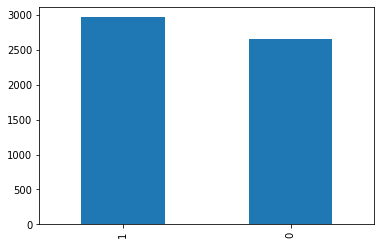

In [ ]:
print('Total number of matches : ', len(gamedata))
gamedata['result'].value_counts().plot(kind = 'bar')
# blue team 승리 2964번 / 패배 2648번
print(gamedata.groupby('result').size().reset_index(name = 'count'))
# blue top에 뭐 나왔는지를 알고 싶음 (이걸 어떻게 하지?)
# blue team에서 탑 / 정글 / 미드 / 원딜 / 서폿 순으로 사용한 챔피언 수 (중복 제외)
blue = gamedata['bluetop'].nunique(), gamedata['bluejungle'].nunique(), gamedata['bluemid'].nunique(), gamedata['blueadc'].nunique(), gamedata['bluesupport'].nunique()
blue

In [ ]:
blueWin = gamedata[gamedata['result'] == 1]
print(blueWin.groupby('bluetop').size().reset_index(name='blue top win'))
blueTopRate = blueWin.groupby('bluetop').size() / 2964 * 100
print(blueTopRate) 
max(blueWin.groupby('bluetop').size()) #레넥톤

         bluetop  blue top win
0         Aatrox           303
1          Akali            36
2           Bard             1
3        Camille           142
4        Chogath            12
5         Darius            13
6        DrMundo             1
7   Fiddlesticks             1
8          Fiora            18
9      Gangplank           138
10          Gnar            39
11        Gragas             2
12        Graves             1
13       Hecarim             8
14        Illaoi             2
15        Irelia            25
16         Janna             1
17           Jax            26
18         Jayce           127
19       Kalista            13
20         Karma            28
21         Kayle            11
22        Kennen            91
23          Kled             6
24        Lillia             1
25        Lucian            23
26      Malphite            24
27        Maokai            45
28    MonkeyKing           192
29   Mordekaiser           192
30      Nautilus             1
31      

418

In [ ]:
Renekton = blueWin[blueWin['bluetop'] == 'Renekton']
Renekton

,Unnamed: 0,gameid,league,blueteam,redteam,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
2,2,ESPORTSTMNT03/1241324,KeSPA,T1,SANDBOX Gaming,Renekton,RekSai,Mordekaiser,Xayah,Rakan,Aatrox,Sejuani,Azir,MissFortune,Nautilus,1
12,12,5656-7252,LPL,LGD Gaming,LNG Esports,Renekton,Gragas,Irelia,Aphelios,Braum,Aatrox,JarvanIV,Leblanc,MissFortune,Leona,1
40,40,5667-7279,LPL,Vici Gaming,Dominus Esports,Renekton,JarvanIV,Rumble,Lucian,Nautilus,Jax,Qiyana,Cassiopeia,MissFortune,Leona,1
70,70,ESPORTSTMNT03/1301251,CBLOL,FURIA Esports,KaBuM! e-Sports,Renekton,JarvanIV,Zoe,Aphelios,Nautilus,Aatrox,Nidalee,Kassadin,Senna,Leona,1
77,77,ESPORTSTMNT03/1301276,CBLOL,Flamengo Esports,Vivo Keyd,Renekton,Elise,Qiyana,Varus,Thresh,Vladimir,Taliyah,Camille,Xayah,Nautilus,1
78,78,ESPORTSTMNT03/1301284,CBLOL,Prodigy Esports,FURIA Esports,Renekton,Elise,Qiyana,Ezreal,Braum,Gangplank,Gragas,Zoe,Aphelios,Leona,1
164,164,ESPORTSTMNT04/1130306,TRA,Beşiktaş Academy,Galakticos Academy,Renekton,JarvanIV,Irelia,Cassiopeia,Thresh,Aatrox,Gragas,Syndra,MissFortune,Leona,1
183,183,ESPORTSTMNT01/1302531,BRCC,Falkol,Santos e-Sports,Renekton,Taliyah,Zoe,Aphelios,Braum,Kled,JarvanIV,Velkoz,MissFortune,Leona,1
206,206,ESPORTSTMNT04/1120585,TRA,İstanbul Wildcats Academy,5 Ronin Academy,Renekton,JarvanIV,Cassiopeia,MissFortune,Braum,Sett,Gragas,Orianna,Lucian,Leona,1
219,219,ESPORTSTMNT01/1303619,VCS,CERBERUS Esports,V Gaming Adonis,Renekton,RekSai,Akali,Kaisa,Leona,Aatrox,Trundle,Ryze,Xayah,Braum,1


In [ ]:
print(blueWin.groupby('blueteam').size().reset_index(name='blue win'))
max(blueWin.groupby('blueteam').size()) #Invictus Gaming Young

                            blueteam  blue win
0                        100 Thieves        12
1                100 Thieves Academy        12
2            1907 Fenerbahçe Academy        10
3            1907 Fenerbahçe Esports        16
4                            5 Ronin         9
5                    5 Ronin Academy         9
6                  7more7 Pompa Team         2
7                          AGO ROGUE         4
8                               AXIZ         6
9                     Afreeca Freecs        24
10                         All Combo        28
11                       All Knights        17
12                     Alpha Esports        15
13                             Asura         8
14                      Avant Gaming        10
15                     Awesome Spear        11
16                    Azules Esports         5
17                          BT Excel         1
18                   Berjaya Dragons        14
19                  Beşiktaş Academy         6
20           

43

In [ ]:
IGY = blueWin[blueWin['blueteam'] == 'Invictus Gaming Young']
IGY

,Unnamed: 0,gameid,league,blueteam,redteam,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
1871,1871,6104-7600,LDL,Invictus Gaming Young,Triumphant Song Gaming,Renekton,Kindred,Zoe,Senna,Thresh,Jax,Nidalee,Pantheon,MissFortune,Maokai,1
1977,1977,6138-7656,LDL,Invictus Gaming Young,Vici Gaming Potential,Maokai,Nidalee,Jayce,Kalista,Bard,MonkeyKing,RekSai,Syndra,Aphelios,Taric,1
1983,1983,6138-7660,LDL,Invictus Gaming Young,Vici Gaming Potential,Ornn,Nidalee,Leblanc,Kalista,Bard,Maokai,Taliyah,Qiyana,Aphelios,Taric,1
2087,2087,6148-7697,LDL,Invictus Gaming Young,FunPlus Phoenix Blaze,Renekton,Ekko,Pantheon,MissFortune,Thresh,Mordekaiser,Trundle,Rumble,Kalista,Blitzcrank,1
2155,2155,6159-7737,LDL,Invictus Gaming Young,Dominus Esports Young,Renekton,Ekko,Pantheon,Senna,Sion,Ornn,Sylas,Sett,Aphelios,Galio,1
2256,2256,6174-7782,LDL,Invictus Gaming Young,Legend Esport Gaming,Ornn,Graves,Syndra,Kalista,Sett,Mordekaiser,LeeSin,Renekton,Ezreal,Nautilus,1
2614,2614,6274-7865,LDL,Invictus Gaming Young,JingNetGame,MonkeyKing,Kindred,Syndra,Ashe,Taric,Darius,Olaf,Karma,Aphelios,Sett,1
2696,2696,6285-7901,LDL,Invictus Gaming Young,Team WE Academy,Renekton,Ekko,Jayce,Ezreal,Sett,Aatrox,Graves,Leblanc,Kaisa,Nautilus,1
2698,2698,6285-7902,LDL,Invictus Gaming Young,Team WE Academy,MonkeyKing,Graves,Karma,Ezreal,Bard,Ornn,LeeSin,Leblanc,Aphelios,Janna,1
2823,2823,6303-7973,LDL,Invictus Gaming Young,Dominus Esports Young,MonkeyKing,Graves,Syndra,Aphelios,Thresh,Malphite,Karthus,Pantheon,MissFortune,Sett,1


In [ ]:
IGY[IGY['bluetop'] == 'Renekton'] #43번 중 15번이 레넥톤 승리

In [ ]:
IGY[IGY['bluejungle'] == 'LeeSin'] #43번 중 0번이 리신 승리

In [ ]:
IGY[IGY['bluemid'] == 'Zoe'] #43번 중 8번이 조이 승리

In [ ]:
IGY[IGY['blueadc'] == 'Aphelios'] #43번 중 7번이 아펠리오스 승리

In [ ]:
IGY[IGY['bluesupport'] == 'Nautilus'] #43번 중 5번 노틸러스 승리

In [ ]:
print(blueWin.groupby('bluejungle').size().reset_index(name='blue jug win'))
max(blueWin.groupby('bluejungle').size()) #리신
blueJungleRate = blueWin.groupby('bluejungle').size() / 2964 * 100
print(blueJungleRate) 

In [ ]:
print(blueWin.groupby('bluemid').size().reset_index(name='blue mid win'))
max(blueWin.groupby('bluemid').size()) #조이
blueMidRate = blueWin.groupby('bluemid').size() / 2964 * 100
print(blueMidRate) 

In [ ]:
print(blueWin.groupby('blueadc').size().reset_index(name='blue adc win'))
max(blueWin.groupby('blueadc').size()) #아펠리오스
blueAdcRate = blueWin.groupby('blueadc').size() / 2964 * 100
print(blueAdcRate) 

In [ ]:
print(blueWin.groupby('bluesupport').size().reset_index(name='blue sup win'))
max(blueWin.groupby('bluesupport').size()) #노틸러스
blueSupportRate = blueWin.groupby('bluesupport').size() / 2964 * 100
print(blueSupportRate) 

In [ ]:
good1 = blueWin[(blueWin['bluetop'] == 'Renekton') & (blueWin['bluejungle'] == 'LeeSin') & (blueWin['bluemid'] == 'Zoe') & (blueWin['blueadc'] == 'Aphelios') & (blueWin['bluesupport'] == 'Nautilus')]
good1 #결과값 없음 놀랍게도

good2 = blueWin[(blueWin['bluetop'] == 'Renekton') & (blueWin['bluejungle'] == 'LeeSin')]
good2 #46
good3 = blueWin[(blueWin['bluetop'] == 'Renekton')& (blueWin['blueadc'] == 'Aphelios')]
good3 #91
good4 = blueWin[(blueWin['bluetop'] == 'Renekton') & (blueWin['bluesupport'] == 'Nautilus')]
good4 #79
good5 = blueWin[ (blueWin['bluejungle'] == 'LeeSin') & (blueWin['bluemid'] == 'Zoe')]
good5 #48
good6 = blueWin[(blueWin['bluejungle'] == 'LeeSin') & (blueWin['blueadc'] == 'Aphelios')]
good6 #111
good7 = blueWin[(blueWin['bluejungle'] == 'LeeSin') & (blueWin['bluesupport'] == 'Nautilus')]
good7 #81
good8 = blueWin[(blueWin['bluemid'] == 'Zoe') & (blueWin['blueadc'] == 'Aphelios')]
good8 #108
good9 = blueWin[(blueWin['bluemid'] == 'Zoe') & (blueWin['bluesupport'] == 'Nautilus')]
good9 #61
good10 = blueWin[(blueWin['blueadc'] == 'Aphelios') & (blueWin['bluesupport'] == 'Nautilus')]
good10 #161

good11 = blueWin[(blueWin['bluetop'] == 'Renekton') & (blueWin['bluejungle'] == 'LeeSin') & (blueWin['bluemid'] == 'Zoe')]
good11 #6
good12 = blueWin[(blueWin['bluetop'] == 'Renekton') & (blueWin['bluejungle'] == 'LeeSin') & (blueWin['blueadc'] == 'Aphelios')]
good12 #9
good13 = blueWin[(blueWin['bluetop'] == 'Renekton') & (blueWin['bluejungle'] == 'LeeSin') & (blueWin['bluesupport'] == 'Nautilus')]
good13 #14
good14 = blueWin[(blueWin['bluejungle'] == 'LeeSin') & (blueWin['bluemid'] == 'Zoe') & (blueWin['blueadc'] == 'Aphelios')]
good14 #10
good15 = blueWin[(blueWin['bluejungle'] == 'LeeSin') & (blueWin['bluemid'] == 'Zoe') & (blueWin['bluesupport'] == 'Nautilus')]
good15 #8
good16 = blueWin[(blueWin['bluemid'] == 'Zoe') & (blueWin['blueadc'] == 'Aphelios') & (blueWin['bluesupport'] == 'Nautilus')]
good16 #25
good17 = blueWin[(blueWin['bluetop'] == 'Renekton') & (blueWin['bluemid'] == 'Zoe') & (blueWin['blueadc'] == 'Aphelios')]
good17 #10
good18 = blueWin[(blueWin['bluetop'] == 'Renekton') & (blueWin['bluemid'] == 'Zoe') & (blueWin['bluesupport'] == 'Nautilus')]
good18 #5

good19 = blueWin[(blueWin['bluetop'] == 'Renekton') & (blueWin['bluejungle'] == 'LeeSin') & (blueWin['bluemid'] == 'Zoe') & (blueWin['blueadc'] == 'Aphelios')]
good19 #1
good20 = blueWin[(blueWin['bluetop'] == 'Renekton') & (blueWin['bluejungle'] == 'LeeSin') & (blueWin['bluemid'] == 'Zoe') & (blueWin['bluesupport'] == 'Nautilus')]
good20 #0
good21 = blueWin[(blueWin['bluetop'] == 'Renekton') & (blueWin['bluejungle'] == 'LeeSin') & (blueWin['blueadc'] == 'Aphelios') & (blueWin['bluesupport'] == 'Nautilus')]
good21 #4
good22 = blueWin[(blueWin['bluetop'] == 'Renekton') & (blueWin['bluemid'] == 'Zoe') & (blueWin['blueadc'] == 'Aphelios') & (blueWin['bluesupport'] == 'Nautilus')]
good22 #3
good23 = blueWin[(blueWin['bluejungle'] == 'LeeSin') & (blueWin['bluemid'] == 'Zoe') & (blueWin['blueadc'] == 'Aphelios') & (blueWin['bluesupport'] == 'Nautilus')]
good23 #2

,Unnamed: 0,gameid,league,blueteam,redteam,bluetop,bluejungle,bluemid,blueadc,bluesupport,redtop,redjungle,redmid,redadc,redsupport,result
968,968,5963-7330,LPL,Oh My God,Rogue Warriors,Gangplank,LeeSin,Zoe,Aphelios,Nautilus,Aatrox,Elise,Azir,MissFortune,Leona,1
2201,2201,6165-7757,LDL,Gama Dream,Team WE Academy,Mordekaiser,LeeSin,Zoe,Aphelios,Nautilus,Aatrox,Trundle,Syndra,MissFortune,Taric,1


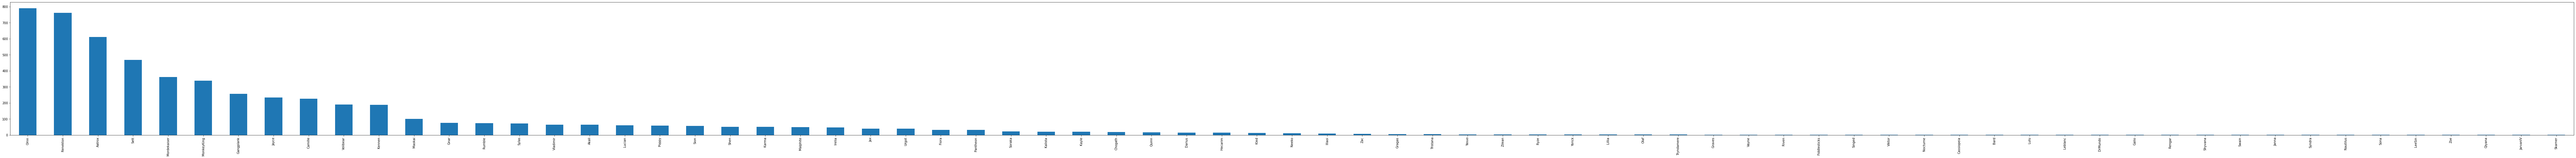

         bluetop  count
0         Aatrox    611
1          Akali     63
2           Bard      1
3        Camille    226
4     Cassiopeia      2
5        Chogath     19
6         Darius     15
7        DrMundo      1
8   Fiddlesticks      2
9          Fiora     32
10         Galio      1
11     Gangplank    257
12          Gnar     76
13        Gragas      5
14        Graves      2
15       Hecarim     14
16        Illaoi      9
17        Irelia     47
18         Janna      1
19      JarvanIV      1
20           Jax     40
21         Jayce    233
22       Kalista     21
23         Karma     50
24         Kayle     20
25        Kennen    187
26          Kled     12
27       Leblanc      1
28        LeeSin      1
29        Lillia      3
30        Lucian     61
31          Lulu      1
32      Malphite     48
33        Maokai    100
34    MonkeyKing    339
35   Mordekaiser    362
36      Nautilus      1
37         Neeko     11
38      Nocturne      2
39          Olaf      3
40          Ornn

In [ ]:
plt.figure(figsize = (150, 8))
gamedata['bluetop'].value_counts().plot(kind = 'bar')
plt.show()
print(gamedata.groupby('bluetop').size().reset_index(name = 'count'))

In [ ]:
plt.figure(figsize = (150, 8))
gamedata['bluejungle'].value_counts().plot(kind = 'bar')
plt.show()
print(gamedata.groupby('bluejungle').size().reset_index(name = 'count'))

In [ ]:
plt.figure(figsize = (150, 8))
gamedata['bluemid'].value_counts().plot(kind = 'bar')
plt.show()
print(gamedata.groupby('bluemid').size().reset_index(name = 'count'))

In [ ]:
plt.figure(figsize = (150, 8))
gamedata['blueadc'].value_counts().plot(kind = 'bar')
plt.show()
print(gamedata.groupby('blueadc').size().reset_index(name = 'count'))

In [ ]:
plt.figure(figsize = (150, 8))
gamedata['bluesupport'].value_counts().plot(kind = 'bar')
plt.show()
print(gamedata.groupby('bluesupport').size().reset_index(name = 'count'))

In [ ]:
lol = championdata.copy()
lol.plot(kind="scatter", x="attack", y="defense", alpha=0.1)
championdata[(championdata['attack'] == 8) & (championdata['defense'] == 5)]

In [ ]:
#Data = [ [blueTopRate], [blueJungleRate], [blueMidRate], [blueAdcRate], [blueSupportRate] ]
#Data
#winRateData = {'Champion' : [], 'Rate' : [10.222672, 1.214575, 0.033738, 4.790823, 0.404858, 0.438596, 0.033738, 0.033738, 0.607287, 4.655870, 1.315789, 0.067476, 0.033738, 0.269906, 0.067476, 0.843455, 0.033738, 0.877193, 4.284750, 0.438596, 0.944669, 0.371120, 3.070175, 0.202429, 0.033738, 0.775978, 0.809717, 1.518219, 6.477733, 6.477733, 0.033738, 0.202429, 0.033738, 0.101215, 13.394062, 0.438596, 1.248313, 0.033738, 0.303644, 14.102564, 0.033738, 0.033738, 1.147099, 0.101215, 8.299595, 0.843455, 0.033738, 0.944669, 0.404858, 1.315789, 0.101215, 0.033738, 0.742240, 0.033738, 0.033738, 1.180837, 3.272605, 0.033738, 0.134953, 0.033738, 0.033738, 0.067476, 0.067476, 2.597841, 3.879892, 0.168691, 0.202429, 5.026991, 10.188934, 0.371120, 0.033738, 7.017544, 1.889339, 0.067476, 0.978408, 2.732794, 12.449393, 1.248313, 0.573549, 0.067476, 6.680162, 0.708502, 0.202429, 6.646424, 0.775978, 0.134953, 0.742240, 0.033738, 5.668016, 0.033738, 4.014845, 3.846154, 0.101215, 0.067476, 0.337382, 0.202429, 0.843455, 0.775978, 11.504723, 0.033738, 6.376518, 0.134953, 0.472335, 0.168691, 0.134953, 2.260459, 0.033738, 0.033738, 0.067476, 8.940621, 0.269906, 2.159244, 0.033738, 3.171390, 0.809717, 1.788124, 0.101215, 0.202429, 0.067476, 4.925776, 0.033738, 0.033738, 0.033738, 0.067476, 1.214575, 1.315789, 0.067476, 0.033738, 2.024291, 0.033738, 0.877193, 0.067476, 0.236167, 8.198381, 1.315789, 1.821862, 0.101215, 0.033738, 0.236167, 0.033738, 0.067476, 0.269906, 0.067476, 0.236167, 0.877193, 0.472335, 0.033738, 6.376518, 1.214575, 2.732794, 1.585695, 0.742240, 3.238866, 1.484480, 2.496626, 0.033738, 0.067476, 0.033738, 2.395412, 10.526316, 0.236167, 0.303644, 0.539811, 4.824561, 0.033738, 0.303644, 0.134953, 0.134953, 0.371120, 1.147099, 0.269906, 1.012146, 0.236167, 0.775978, 0.236167, 11.538462, 0.033738, 22.840756, 9.345479, 4.251012, 0.269906, 0.539811, 14.709852, 0.033738, 0.101215, 2.597841, 0.269906, 2.294197, 9.109312, 0.168691, 0.033738, 0.134953, 0.910931, 8.535762, 0.101215, 0.033738, 0.033738, 0.033738, 7.860999, 0.033738, 0.607287, 0.202429, 0.033738, 0.944669, 0.033738, 0.168691, 0.337382, 0.033738, 9.615385, 0.202429, 0.033738, 0.101215, 0.033738, 2.631579, 0.168691, 0.573549, 1.282051, 6.950067, 2.159244, 10.829960, 0.033738, 0.742240, 0.168691, 0.101215, 3.340081, 0.033738, 7.186235, 1.214575, 1.923077, 0.472335, 0.168691, 0.033738, 2.024291, 17.712551, 1.484480, 0.101215, 0.337382, 4.183536, 0.236167, 0.033738, 0.742240, 3.609987, 0.236167, 0.101215, 0.101215, 0.033738, 8.535762, 4.116059, 15.249663, 0.067476, 0.033738, 0.236167, 3.947368, 0.236167] }

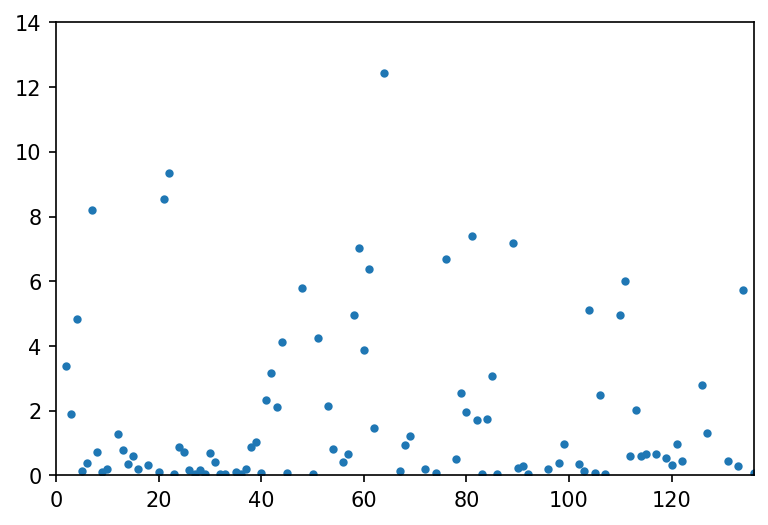

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = None
winRateData = pd.read_csv("./winrate.csv")
winRateData

KeyVaule = winRateData.loc[:, 'Key']
KeyVaule
WinValue = winRateData.loc[:, 'WinRate']
WinValue

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.xlim(0, 136)
plt.ylim(0, 14)
plt.plot(KeyVaule, WinValue, ".")

1.7232792403503507
[0.00365451]


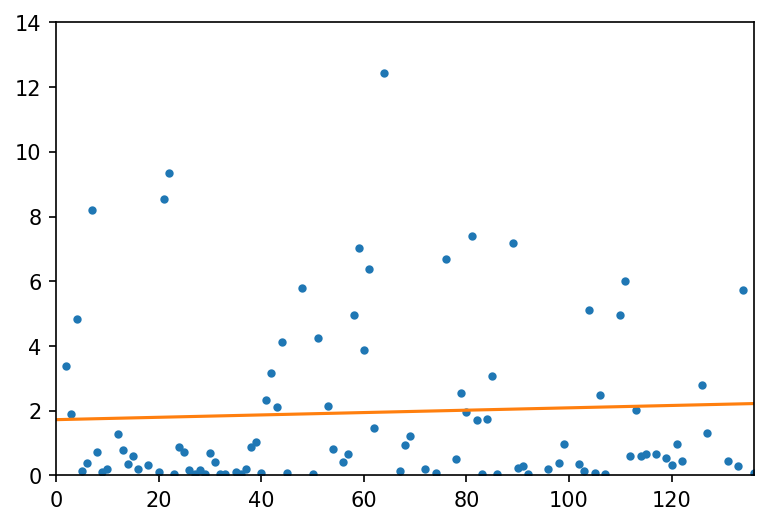

In [ ]:
X = [[KeyVaule[m]] for m in range(0, 137)]
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X, WinValue)
print(reg.intercept_)
print(reg.coef_)
xp = [0.1*k for k in range(1360)]
Xp = [[xp[m]] for m in range(1360)]
yp = reg.predict(Xp)

plt.xlim(0, 136)
plt.ylim(0, 14)
plt.plot(KeyVaule, WinValue, ".")
plt.plot(xp, yp)

# y = 1.7232792403503507 + 0.00365451x

1.4248407881351426
[ 7.92559762e-03 -6.64228016e-06]


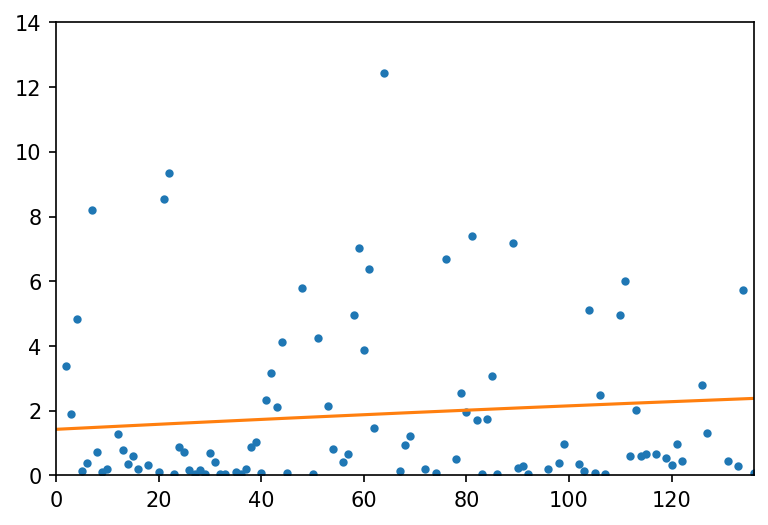

In [ ]:
X2 = [[KeyVaule[k], KeyVaule[k]**2] for k in range(0, 137)]
from sklearn import linear_model
reg2 = linear_model.LinearRegression()
reg2.fit(X2, WinValue)
print(reg2.intercept_)
print(reg2.coef_)
xp2 = [0.1*k for k in range(1360)]
Xp2 = [[xp2[k], xp2[k]**2] for k in range(1360)]
yp2 = reg2.predict(Xp2)

plt.xlim(0, 136)
plt.ylim(0, 14)
plt.plot(KeyVaule, WinValue, ".")
plt.plot(xp2, yp2)

# y = 1.4248407881351426 + 7.92559762e-03x -6.64228016e-06x^2

1.8042119007811814
[-3.70907892e-04  2.35312986e-05 -2.54409223e-08]


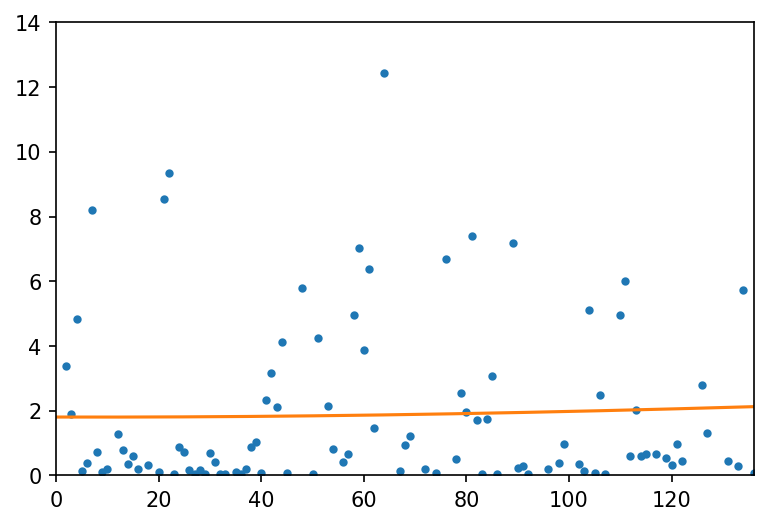

In [ ]:
X3 = [[KeyVaule[k], KeyVaule[k]**2 , KeyVaule[k] **3] for k in range(0, 137)]
from sklearn import linear_model
reg3 = linear_model.LinearRegression()
reg3.fit(X3, WinValue)
print(reg3.intercept_)
print(reg3.coef_)
xp3 = [0.1*k for k in range(1360)]
Xp3 = [[xp3[k], xp3[k]**2, xp3[k]**3] for k in range(1360)]
yp3 = reg3.predict(Xp3)

plt.xlim(0, 136)
plt.ylim(0, 14)
plt.plot(KeyVaule, WinValue, ".")
plt.plot(xp3, yp3)
# y = 1.8042119007811814 -3.70907892e-04x + 2.35312986e-05^2 -2.54409223e-08x^3

1.8755663560153382
[-1.54868780e-07 -1.15912769e-05  2.86873307e-08  8.96662841e-10
 -2.69681577e-12  1.88979774e-15 -1.26207909e-19  2.13452303e-19
  6.69156028e-20  3.51518673e-20]


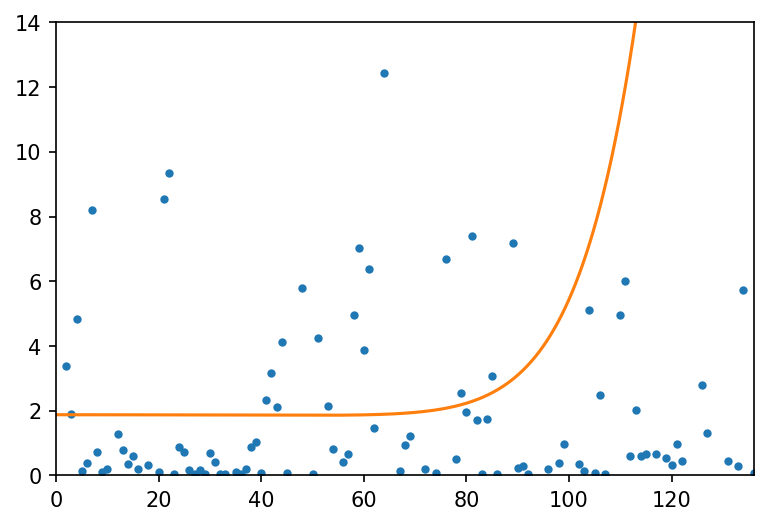

In [ ]:
X10 = [[KeyVaule[k]**n for n in range(1, 11)] for k in range(0, 137)]
from sklearn import linear_model
reg10 = linear_model.LinearRegression()
reg10.fit(X10, WinValue)
print(reg10.intercept_)
print(reg10.coef_)
xp10 = [0.1*k for k in range(1360)]
Xp10 = [[xp10[k]**n for n in range(1, 11)] for k in range(1360)]
yp10 = reg10.predict(Xp10)

plt.xlim(0, 136)
plt.ylim(0, 14)
plt.plot(KeyVaule, WinValue, ".")
plt.plot(xp10, yp10)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = None
combinationData = pd.read_csv("./lolcombination.csv")
combinationData

CombinationValue = combinationData.loc[:, 'Top':'Support']
CombinationValue
WinRate = combinationData.loc[:, 'TopRate':'SupRate']
WinRate

from sklearn.linear_model import LinearRegression
model = LinearRegression() 

model.fit(CombinationValue.values, WinRate)

result = model.predict([[58, 245, 117, 81, 3]])
print("조합 예상 승률:", result)

조합 예상 승률: [[1.52636645 2.49298621 2.5452418  2.19979368 1.94430899]]


R-square:  0.917743970441702


X 기울기:  [0.28041877 0.18447805 0.22341542 0.2052011  0.15538248]
y 절편:  0.039684117078504055


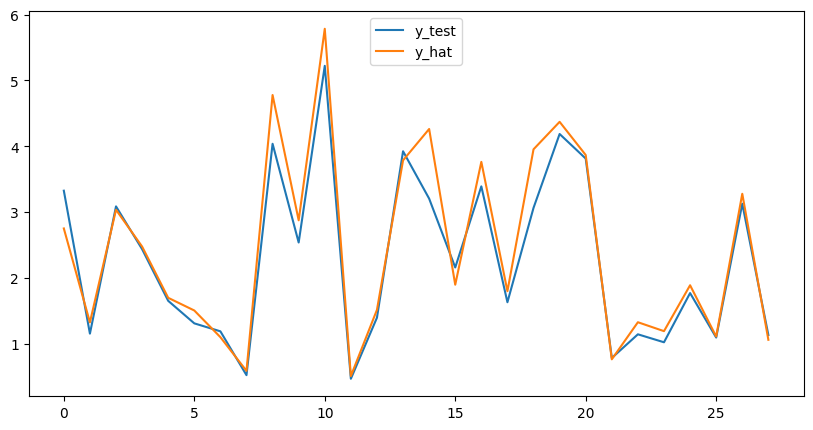

조합 예상 승률: [3.89619885]


In [19]:
import pandas as pd
combinationData = pd.read_csv("./lolcombination.csv")

#CombinationValue = combinationData.loc[:, 'Top':'Support']
#CombinationValue
LineWinRate = combinationData.loc[:, 'TopRate':'SupRate']
LineWinRate

AvgWinRate = combinationData.loc[:, 'Avg']
AvgWinRate

X = LineWinRate.values
y = AvgWinRate.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

r_square = lr.score(X_test, y_test)
print('R-square: ', r_square)
print('\n')

print('X 기울기: ', lr.coef_)

print('y 절편: ', lr.intercept_ )

import matplotlib.pyplot as plt

y_hat = lr.predict(X_test)
plt.figure(figsize=(10,5))

plt.plot(y_test, label='y_test')
plt.plot(y_hat, label='y_hat')
plt.legend(loc='upper center')
plt.show()




result = lr.predict([[3.475034, 4.563091, 0.337382, 9.345479, 0.303644]])
print("조합 예상 승률:", result)


R-square:  0.917743970441702


X 기울기:  [0.28041877 0.18447805 0.22341542 0.2052011  0.15538248]
y 절편:  0.039684117078504055


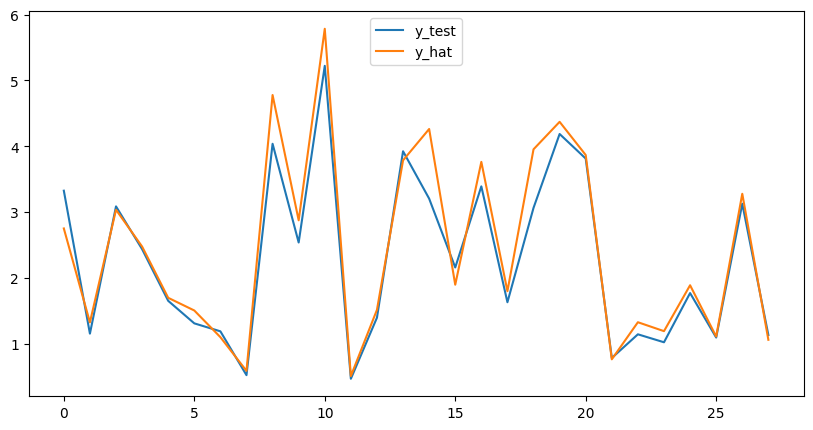

조합 예상 승률: [38.96198854]


In [20]:
# 수정한 예측 모델

import csv

win_csv = {}

with open('winrate2.csv', mode='r') as inp:
    reader = csv.reader(inp)
    win_csv = {rows[0]:rows[1] for rows in reader}

import pandas as pd
combinationData = pd.read_csv("./lolcombination.csv")

CombinationValue = combinationData.loc[:, 'Top':'Support']
CombinationValue
LineWinRate = combinationData.loc[:, 'TopRate':'SupRate']
LineWinRate

AvgWinRate = combinationData.loc[:, 'Avg']
AvgWinRate

X = LineWinRate.values
y = AvgWinRate.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

r_square = lr.score(X_test, y_test)
print('R-square: ', r_square)
print('\n')

print('X 기울기: ', lr.coef_)

print('y 절편: ', lr.intercept_ )

import matplotlib.pyplot as plt

y_hat = lr.predict(X_test)
plt.figure(figsize=(10,5))

plt.plot(y_test, label='y_test')
plt.plot(y_hat, label='y_hat')
plt.legend(loc='upper center')
plt.show()

Top = float(win_csv['Aatrox'])
Mid = float(win_csv['Sett'])
Jungle = float(win_csv['Sion'])
Adc = float(win_csv['Ashe'])
Sup = float(win_csv['Talon'])


result = lr.predict([[Top, Mid, Jungle, Adc, Sup]])
print("조합 예상 승률:", result)


In [40]:
# 입력 받는 형태로 만들려고 했는데 실패함

import csv

win_csv = {}

with open('winrate2.csv', mode='r') as inp:
    reader = csv.reader(inp)
    win_csv = {rows[0]:rows[1] for rows in reader}


top = input().split() 

Top = float(win_csv[top]) # unhashable type: 'list'


Aatrox


TypeError: ignored